In [24]:
# K Means Algorithms 
# Clustering:-
# Clustering is a technique in data analysis and machine learning that involves grouping a set of objects or data points into clusters,
# so that the objects in the same cluster are more similar to each other than to those in other clusters.
# It's an unsupervised learning method, meaning that it doesn't rely on labeled data; instead, it discovers the inherent structure in the data.

# K Means:-
# K means is an unsupervised learning technique tha separate item into cluster base on similarly andnwith the nearest K mean
# K = Number of Cluster you want to create.
# You must tell the system how many clusters you need beforehand. 

# steps:-
# 1 Finding K value
# 2 Measuring Distance
# 3 Grouping
# 4 Repositioning Centroids
# 5 Convergence
# Centroid :- Randomly Pick center of each clusters 

# 1 Finding K Value:-
# 1.1 Hit and Trial
# Continue this method until we get the best clusters
# 2.2 Elbow Method 
# In this method, you start with some random value of K, and then you try to compute the within-sum-of-square-error 
# For each iteration we will compute wss value, and we plot them against the K iteration. For this graphical visualisation,
# we choose points where K value is optimum

# 2 Measuring distance:-
# We assign the random centroid in the plane
# The distance of each data point for the centre is measured.

# 3 Grouping :-
# Base on the distance matrix, the data point will be assigned to the centroid. This initial gathering
# of data point is considered as initial grouping

# 4 Repositioning centroid:-
# Find the optimal Position of centroid.

# 5 Convergence:-
# Once the cluster becomes static came in algorithm is said to be convergence.


In [25]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [26]:
data = datasets.load_wine()
x = data.data
y = data.target

In [27]:
df = pd.DataFrame(x,columns=data.feature_names)
df["wine class"] = y

In [28]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [29]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine class                      0
dtype: int64

In [30]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [31]:
# scale databse
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [37]:
# apply k mean 
from sklearn.cluster import KMeans
wss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wss.append(kmeans.inertia_)
wss

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1197.2161544828475,
 1121.3332511409365,
 1100.1537456474414,
 1038.9401071318425,
 975.9157472956817,
 945.0997317492399,
 937.054602005431]

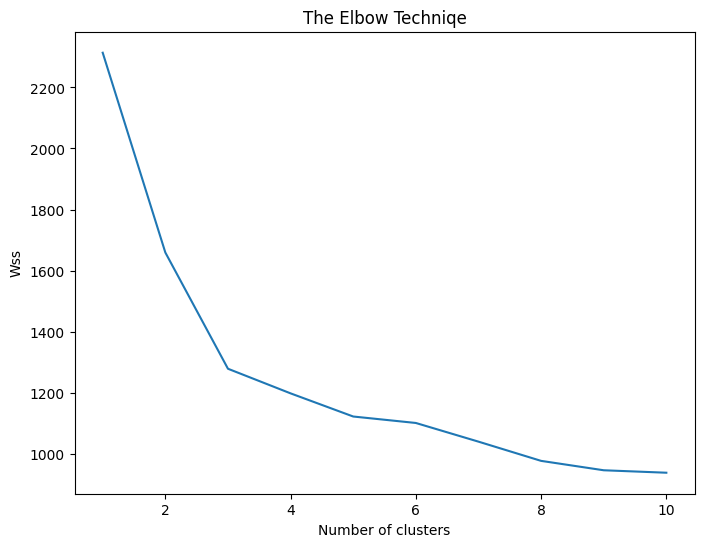

In [33]:
f3,ax = plt.subplots(figsize = (8,6))
plt.plot(range(1,11),wss)
plt.title("The Elbow Techniqe")
plt.xlabel("Number of clusters")
plt.ylabel("Wss")
plt.show()

In [34]:
N = 3
k_means = KMeans(init = "k-means++" ,n_clusters=N,n_init=10,max_iter=960)
k_means.fit(x)
labels= k_means.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(labels,y)


0.9662921348314607